# Install Dependencies

In [21]:
# install dependencies
!pip install qiskit matplotlib numpy cirq qiskit[visualization] qiskit-aer opencv-python


ERROR: Could not find a version that satisfies the requirement cv2_imshow (from versions: none)
ERROR: No matching distribution found for cv2_imshow


In [20]:
# install dependencies
!pip install cv2_imshow cv2


ERROR: Could not find a version that satisfies the requirement cv2_imshow (from versions: none)
ERROR: No matching distribution found for cv2_imshow


Counts: {'110': 1, '000': 8}


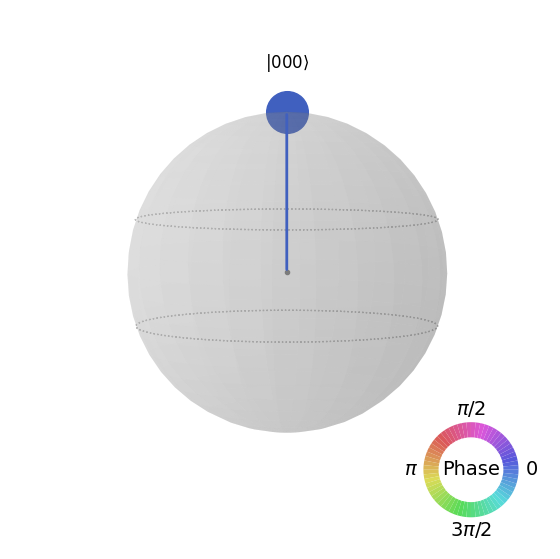

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


# Quantum Circuit with 3 qubits for RGB
qc = QuantumCircuit(3)
theta = (3.14 / 4)

# Use X gate to set the qubit to |1⟩ directly
qc.reset(0)  # Ensure qubit 0 is |0⟩ initially
qc.reset(1)  # Ensure qubit 1 is |0⟩ initially
qc.reset(2)  # Ensure qubit 2 is |0⟩ initially

# Encode
qc.ch(0, 1)
qc.ch(1, 2)
qc.ry(theta, 0, label="Blue_Qubit")
qc.ry(theta, 1, label="Red_Qubit")
qc.ry(theta, 2, label="Green_Qubit")

# Variational Model
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(1, 2)

# Measurement
qc.measure_all()


# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=9).result()
statevector = result.get_statevector()

# Get the measurement results
counts = result.get_counts(qc)
print("Counts:", counts)

# Visualize the state on a q-sphere
plot_state_qsphere(statevector)

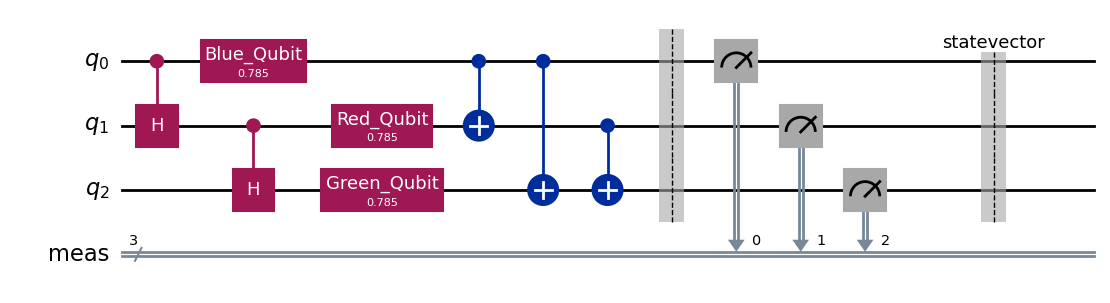

In [13]:
qc.draw("mpl")

RGB Color: (0.1111111111111111, 0.2222222222222222, 0.1111111111111111)


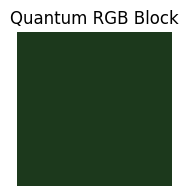

In [4]:
# Function to convert measurement results to RGB
def counts_to_rgb(counts):
    """Convert quantum measurement counts to an RGB color."""
    r, g, b = 0, 0, 0

    for key, value in counts.items():
        bitstring = key[::-1]  # Reverse for correct qubit order
        r += int(bitstring[0]) * value
        g += int(bitstring[1]) * value
        b += int(bitstring[2]) * value

    total = sum(counts.values())
    r, g, b = r / total, g / total, b / total

    return (r, g, b)

# Generate RGB color from quantum results
rgb_color = counts_to_rgb(counts)
print("RGB Color:", rgb_color)

# Render an image with the RGB color
fig, ax = plt.subplots(figsize=(2, 2))
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=rgb_color))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title("Quantum RGB Block")
plt.show()

RGB Values: (0.2901960784313726, 0.5647058823529412, 0.8862745098039215)
Counts: {'110': 1, '000': 3, '100': 6}


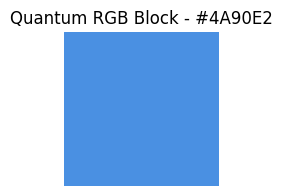

In [30]:
# Hex to image

# Use X gate to set the qubit to |1⟩ directly
qc.reset(0)  # Ensure qubit 0 is |0⟩ initially
qc.reset(1)  # Ensure qubit 1 is |0⟩ initially
qc.reset(2)  # Ensure qubit 2 is |0⟩ initially

# Function to convert a hex code to an RGB tuple (0-1 range)
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    r = int(hex_code[0:2], 16) / 255.0
    g = int(hex_code[2:4], 16) / 255.0
    b = int(hex_code[4:6], 16) / 255.0
    return (r, g, b)

# Quantum Circuit with 3 qubits for RGB
qc = QuantumCircuit(3)

# Input hex code and convert to RGB
hex_code = '#4A90E2'  # Example hex code for a blueish color
rgb_values = hex_to_rgb(hex_code)
print("RGB Values:", rgb_values)

# Set up qubits based on the RGB values
# Assuming the rotation angle is proportional to the intensity of each channel
qc.ry(2 * rgb_values[0], 0, label="Red")  # Red channel
qc.ry(2 * rgb_values[1], 1, label="Green")  # Green channel
qc.ry(2 * rgb_values[2], 2, label="Blue")  # Blue channel

# Measurement
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10).result()

# Get the measurement results
counts = result.get_counts(qc)
print("Counts:", counts)

# Render an image with the RGB color
fig, ax = plt.subplots(figsize=(2, 2))
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=rgb_values))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title(f"Quantum RGB Block - {hex_code}")
plt.show()

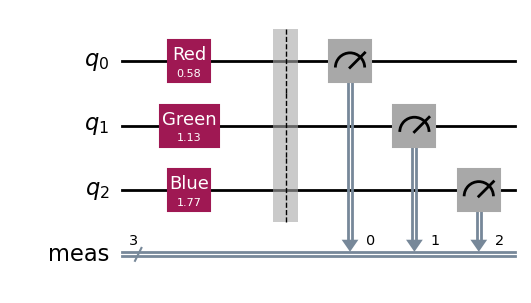

In [31]:
qc.draw("mpl")


# Image Processing


In [22]:
# install dependencies
!pip install opencv-python


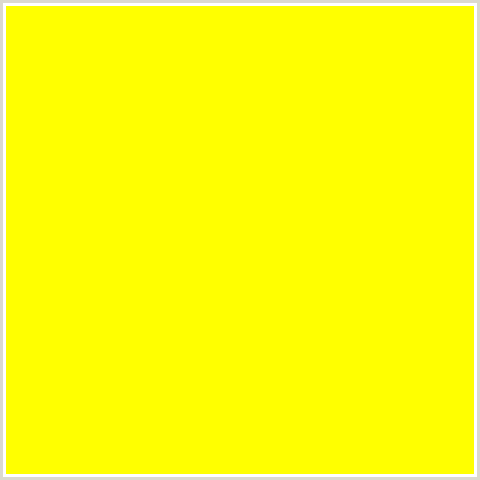

RGB Intensities: (0.9965900735294118, 0.9962977941176471, 0.044698529411764706)


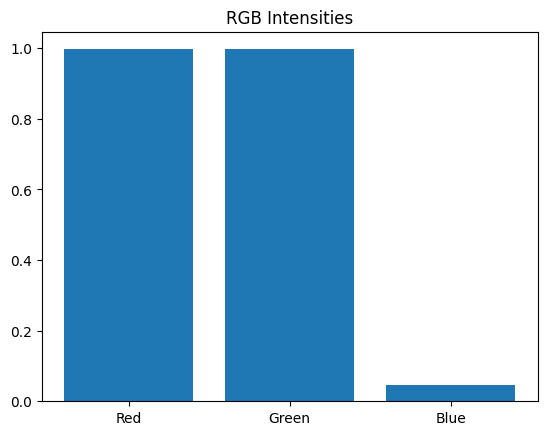

Quantum Measurement Counts: {'011': 97, '111': 3}
Rendered RGB from Quantum Simulation: (1.0, 1.0, 0.03)


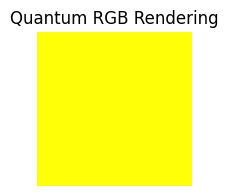

In [28]:
# Analyze colors and render via quantum simulation
import cv2

# Use X gate to set the qubit to |1⟩ directly
qc.reset(0)  # Ensure qubit 0 is |0⟩ initially
qc.reset(1)  # Ensure qubit 1 is |0⟩ initially
qc.reset(2)  # Ensure qubit 2 is |0⟩ initially

# Function to convert an image to average RGB intensity (0-1 scale)
def image_to_rgb_intensity(image_path):
    # Load and convert the image to RGB format
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the image into its Red, Green, and Blue channels
    red_channel = image_rgb[:, :, 0]
    green_channel = image_rgb[:, :, 1]
    blue_channel = image_rgb[:, :, 2]

    # Calculate the average intensity of each channel (normalized to 0-1)
    red_intensity = np.mean(red_channel) / 255.0
    green_intensity = np.mean(green_channel) / 255.0
    blue_intensity = np.mean(blue_channel) / 255.0

    return (red_intensity, green_intensity, blue_intensity)

# Sample image path under files/content (replace with your image file)

image_path = 'yellow-block.png'
rgb_values = image_to_rgb_intensity(image_path)
cv2_imshow(cv2.imread(image_path))

print("RGB Intensities:", rgb_values)
plt.title("RGB Intensities")
plt.bar(['Red', 'Green', 'Blue'], rgb_values)
plt.show()

# Quantum Circuit with 3 qubits for RGB channels
qc = QuantumCircuit(3)

# Map RGB intensities to quantum states using ry rotations
# The rotation angle is proportional to the intensity of each channel
qc.ry(2 * np.arcsin(np.sqrt(rgb_values[0])), 0, label="Red")  # Red channel
qc.ry(2 * np.arcsin(np.sqrt(rgb_values[1])), 1, label="Green")  # Green channel
qc.ry(2 * np.arcsin(np.sqrt(rgb_values[2])), 2, label="Blue")  # Blue channel

# Measurement
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=100).result()

# Get the measurement results
counts = result.get_counts(qc)
print("Quantum Measurement Counts:", counts)

# Convert quantum measurement counts to RGB values
def counts_to_rgb(counts):
    r, g, b = 0, 0, 0
    total = sum(counts.values())

    for key, value in counts.items():
        bitstring = key[::-1]  # Correct qubit order
        r += int(bitstring[0]) * value
        g += int(bitstring[1]) * value
        b += int(bitstring[2]) * value

    # Normalize RGB values to 0-1 range
    r, g, b = r / total, g / total, b / total
    return (r, g, b)

# Calculate the rendered color from quantum measurements
quantum_rgb = counts_to_rgb(counts)
print("Rendered RGB from Quantum Simulation:", quantum_rgb)

# Visualize the quantum-based color rendering
fig, ax = plt.subplots(figsize=(2, 2))
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=quantum_rgb))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title("Quantum RGB Rendering")
plt.show()


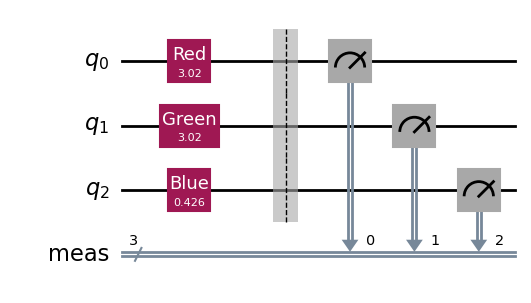

In [29]:
qc.draw('mpl')

# Web

In [ ]:
# API runs locally to the collab environment

from flask import Flask, jsonify
import random

app = Flask(__name__)

@app.route('/quantum-rgb', methods=['GET'])
def quantum_rgb():
    # Quantum Circuit with 3 qubits for RGB channels
    qc = QuantumCircuit(3)

    # Generate random intensity values as an example
    rgb_values = (random.random(), random.random(), random.random())

    # Map intensities to quantum rotation angles
    qc.ry(2 * np.arcsin(np.sqrt(rgb_values[0])), 0)  # Red
    qc.ry(2 * np.arcsin(np.sqrt(rgb_values[1])), 1)  # Green
    qc.ry(2 * np.arcsin(np.sqrt(rgb_values[2])), 2)  # Blue

    # Measurement
    qc.measure_all()

    # Simulate the quantum circuit
    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=100).result()

    # Get the measurement results and convert to RGB
    counts = result.get_counts(qc)
    total = sum(counts.values())
    r = counts.get('100', 0) / total
    g = counts.get('010', 0) / total
    b = counts.get('001', 0) / total

    return jsonify({'r': r, 'g': g, 'b': b})

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
